In [24]:
# d6598 
# "I bet computers can't make music"
# - Felonious Gru

beat_resolution = 24 # Standard of 24 for full 34 and 44 representation.
                    # Dont go below 8 otherwise risk distortion. 12 is a safe spot to end up
lookback = beat_resolution * 4 * 2  # Approx 2 bars
step = 1  # Skip through it a bit
tempo = 60  # Rough tempo of the samples. Only used for accurate timing of the output
num_pitches = 50  # Must be even cause odd numbers suck
train = False

%matplotlib inline
import os
import functions

Lower bound 39.
Upper bound 89.
Num pitches 50
---
goldberg.mid input shape: (153743, 128)
...Refined down 78 dimensions with 1815 note loss.
...Loss of 0.49 %
...Output shape: (153743, 50)
Extended output shape (153743, 50)


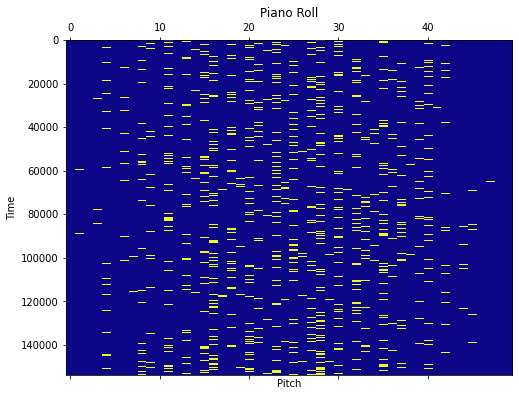

153551 individual phrases.


In [25]:
root = '/Users/James/Projects/PycharmProjects/lstm-generation'
#root = '/home/ubuntu/deep-learning/music/lstm-generation-bach'
#root = '/content....'

midi_dir = os.path.join(root, 'midi')
model_dir = os.path.join(root, 'models')

trainer = functions.Midi(num_pitches, beat_resolution=beat_resolution, midi_dir=midi_dir)
trainer.load_midi(['goldberg.mid'])
trainer.display()

x, y = trainer.vectorise(lookback, step=1)

In [26]:
if train:
    from keras.models import Sequential
    from keras import layers
    from keras.optimizers import RMSprop

    model = Sequential()
    model.add(layers.LSTM(256, input_shape=(lookback, num_pitches), return_sequences=True, dropout=0.1, recurrent_dropout=0.2))
    model.add(layers.LSTM(128, dropout=0.1, recurrent_dropout=0.2, return_sequences=False))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_pitches, activation='sigmoid'))
    model.summary()

    model.compile(loss='categorical_crossentropy',  # categorical_crossentropy or mse
                  optimizer=RMSprop(),
                  metrics=['acc'])

    from time import time
    begin = time()
    for i in range(10):
        print('>Epoch batch', i)
        tic = time()
        history = model.fit(x, y,
                            epochs=10,
                            batch_size=512,
                            verbose=1)
        print('Took %s minutes for epoch. %s minutes elapsed.' % (((time()-tic)/60).__round__(2), ((time()-begin)/60).__round__(2)))
        functions.save_model(model, model_dir, fname='lstm-v13.h5')
    print('Full train took %s minutes.' % ((time()-begin)/60).__round__(2))

else:
    from keras import models
    fname = os.path.join(model_dir, 'lstm-v13.h5')
    model = functions.load_model(fname)

Loaded model "/Users/James/Projects/PycharmProjects/lstm-generation/models/lstm-v2.h5"


In [27]:
#temps = [0.5, 0.55, 0.6, 0.7]
temps = [0.6]  # Was best one
outputs = functions.generate_music(model, trainer.roll, lookback, temps, num_pitches, length=lookback*4)

functions.multi_save(outputs, 'generated-v13.mid')

Generating with seed index of 49066
Generating roll with temp 0.6 and length 768


ValueError: in user code:

    /Users/james/Projects/Envs/music-generator/lib/python3.7/site-packages/keras/engine/training.py:1544 predict_function  *
        return step_function(self, iterator)
    /Users/james/Projects/Envs/music-generator/lib/python3.7/site-packages/keras/engine/training.py:1527 run_step  *
        outputs = model.predict_step(data)
    /Users/james/Projects/Envs/music-generator/lib/python3.7/site-packages/keras/engine/training.py:1500 predict_step  *
        return self(x, training=False)
    /Users/james/Projects/Envs/music-generator/lib/python3.7/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/james/Projects/Envs/music-generator/lib/python3.7/site-packages/keras/engine/input_spec.py:264 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_1: expected shape=(None, None, 51), found shape=(None, 192, 50)
